In [1]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing /home/nazar/anaconda3/lib/python3.7/site-packages/fileupload/static -> fileupload
Up to date: /home/nazar/.local/share/jupyter/nbextensions/fileupload/extension.js
Up to date: /home/nazar/.local/share/jupyter/nbextensions/fileupload/widget.js
Up to date: /home/nazar/.local/share/jupyter/nbextensions/fileupload/fileupload/widget.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: OK


In [4]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

In [11]:
with open("/home/nazar/Downloads/poe.txt", encoding = 'utf-8') as f:
    my_file = f.read()
    print(type(my_file))

<class 'str'>


In [56]:
motivational_speech = "Don’t ever let someone tell you, you can’t do something. Not even me. You got a dream, you got to protect it . People can’t do something themselves, they want to tell you you can’t do it . You want something, go get it . Period. So what makes a great leader in the 21st century? I’ve met many, and they stand out . They are women and men who are preparing themselves not for the comfortable predictability of yesterday but also for the realities of today and all of those unknown possibilities of tomorrow. When I was about 28, after a decade as a professional comedian, I realized one night in LA that the purpose of my life had always been to free people from concern, just like my dad. And when I realized this, I dubbed my new devotion the Church of Freedom From Concern, the Church of FFC. And I dedicated myself to that ministry. What’s yours? How will you serve the world? What did they need that your talent can provide? That’s all you have to figure out . Let me tell you something you already know. The world ain’t all sunshine and rainbows. It’s a very mean and nasty place, and I don’t care how tough you are, it will beat you to your knees and keep you there permanently if you let it. You, me, or nobody is gonna hit as hard as life. But it ain’t about how hard you hit. It’s about how hard you can get hit and keep moving forward. How much you can take and keep moving forward. That’s how winning is done!"

Write a function in the cell below that iterates through the words in *file_contents*, removes punctuation, and counts the frequency of each word.  Oh, and be sure to make it ignore word case, words that do not contain all alphabets and boring words like "and" or "the".  Then use it in the `generate_from_frequencies` function to generate your very own word cloud!
<br><br>
**Hint:** Try storing the results of your iteration in a dictionary before passing them into wordcloud via the `generate_from_frequencies` function.

In [57]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "out", "such", "in", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE
    
    dict_frequencies = {}
    f = file_contents.split()
    for word in f:
        if word.lower() not in uninteresting_words:
            for letter in word:
                if letter in punctuations:
                    letter.replace(punctuations,"")
            if word not in dict_frequencies.keys():
                dict_frequencies[word] = 0
            else :
                dict_frequencies[word]+=1
    
    
    #wordcloud
    cloud = wordcloud.WordCloud()
    print(dict_frequencies)
    cloud.generate_from_frequencies(dict_frequencies)
    return cloud.to_array()

In [58]:
calculate_frequencies(motivational_speech)

{'Don’t': 0, 'ever': 0, 'let': 1, 'someone': 0, 'tell': 2, 'you,': 0, 'can’t': 2, 'something.': 0, 'Not': 0, 'even': 0, 'me.': 0, 'got': 1, 'dream,': 0, 'protect': 0, '.': 4, 'People': 0, 'something': 1, 'themselves,': 0, 'want': 1, 'something,': 0, 'go': 0, 'get': 1, 'Period.': 0, 'So': 0, 'makes': 0, 'great': 0, 'leader': 0, '21st': 0, 'century?': 0, 'I’ve': 0, 'met': 0, 'many,': 0, 'stand': 0, 'women': 0, 'men': 0, 'preparing': 0, 'themselves': 0, 'not': 0, 'for': 1, 'comfortable': 0, 'predictability': 0, 'yesterday': 0, 'also': 0, 'realities': 0, 'today': 0, 'those': 0, 'unknown': 0, 'possibilities': 0, 'tomorrow.': 0, 'about': 2, '28,': 0, 'after': 0, 'decade': 0, 'professional': 0, 'comedian,': 0, 'realized': 1, 'one': 0, 'night': 0, 'LA': 0, 'purpose': 0, 'life': 0, 'always': 0, 'free': 0, 'people': 0, 'concern,': 0, 'like': 0, 'dad.': 0, 'this,': 0, 'dubbed': 0, 'new': 0, 'devotion': 0, 'Church': 1, 'Freedom': 0, 'Concern,': 0, 'FFC.': 0, 'dedicated': 0, 'myself': 0, 'ministry.

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

{'Don’t': 0, 'ever': 0, 'let': 1, 'someone': 0, 'tell': 2, 'you,': 0, 'can’t': 2, 'something.': 0, 'Not': 0, 'even': 0, 'me.': 0, 'got': 1, 'dream,': 0, 'protect': 0, '.': 4, 'People': 0, 'something': 1, 'themselves,': 0, 'want': 1, 'something,': 0, 'go': 0, 'get': 1, 'Period.': 0, 'So': 0, 'makes': 0, 'great': 0, 'leader': 0, '21st': 0, 'century?': 0, 'I’ve': 0, 'met': 0, 'many,': 0, 'stand': 0, 'women': 0, 'men': 0, 'preparing': 0, 'themselves': 0, 'not': 0, 'for': 1, 'comfortable': 0, 'predictability': 0, 'yesterday': 0, 'also': 0, 'realities': 0, 'today': 0, 'those': 0, 'unknown': 0, 'possibilities': 0, 'tomorrow.': 0, 'about': 2, '28,': 0, 'after': 0, 'decade': 0, 'professional': 0, 'comedian,': 0, 'realized': 1, 'one': 0, 'night': 0, 'LA': 0, 'purpose': 0, 'life': 0, 'always': 0, 'free': 0, 'people': 0, 'concern,': 0, 'like': 0, 'dad.': 0, 'this,': 0, 'dubbed': 0, 'new': 0, 'devotion': 0, 'Church': 1, 'Freedom': 0, 'Concern,': 0, 'FFC.': 0, 'dedicated': 0, 'myself': 0, 'ministry.

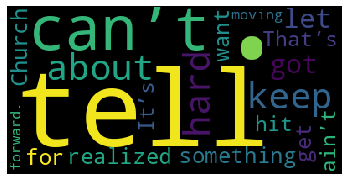

In [59]:
# Display your wordcloud image

myimage = calculate_frequencies(motivational_speech)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()